<a href="https://colab.research.google.com/github/johanesjesito/MeuPCC/blob/main/PCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydistmesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Created wheel for pydistmesh: filename=PyDistMesh-1.2-cp37-cp37m-linux_x86_64.whl size=101136 sha256=06c57ccb1339fafd8770674599d552176258f4f119372fe33ddf61b93c3c2587
  Stored in directory: /root/.cache/pip/wheels/ef/42/30/6b05aedc186d259d16147ef3937064685f0c1716f321747521
Successfully built pydistmesh


In [ ]:
!git clone 'https://github.com/johanesjesito/Pydec-3.7.git'

Cloning into 'Pydec-3.7'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 142 (delta 0), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (142/142), 87.28 KiB | 797.00 KiB/s, done.
Resolving deltas: 100% (16/16), done.


Inserir a pasta do Pydec que esta em "/content/Pydec-3.7" dentro da pasta "/usr/local/lib/python3.7/dist-packages"

In [ ]:
#Metodos

from pydec import simplicial_complex, d, delta, whitney_innerproduct, \
     simplex_quivers
from numpy import loadtxt, savetxt
from scipy import real, zeros
from scipy.linalg import eig
from matplotlib.pylab import quiver, figure, triplot, show
import distmesh as dm
import numpy as np

#geração de Malha
def geracaoDeMalha(valor1, valor2, valor3, tamanho):

  p, t = dm.distmesh2d(valor1, valor2, valor3, (0,0,tamanho,tamanho),
                       [(0,0),(0,tamanho),(tamanho,0),(tamanho,tamanho)])

  print(p.shape)
  print(t.shape)

  return p, t

#calcular Valores e Vetores
def calcularValoresVetores(ivertices, itriangulos):
# Leia em dados de malha de arquivos e construa complexos
  vertices = ivertices
  triangles = itriangulos
  sc = simplicial_complex((vertices,triangles))

  # Construir matrizes de rigidez e massa 
  K = sc[1].d.T * whitney_innerproduct(sc,2) * sc[1].d
  M = whitney_innerproduct(sc,1)

  # Elimine os limites das matrizes
  boundary_edges = sc.boundary()
  non_boundary_edges = set(sc[1].simplex_to_index.keys()) - set(boundary_edges)
  non_boundary_indices = [sc[1].simplex_to_index[e] for e in non_boundary_edges]

  # Elimine as condições de contorno
  K = K[non_boundary_indices,:][:,non_boundary_indices]
  M = M[non_boundary_indices,:][:,non_boundary_indices]

  # Calcular autovalores e autovetores
  eigenvalues, eigenvectors = eig(K.todense(), M.todense())

  print(eigenvalues.size)
  print(eigenvectors.size)

  return np.sort(eigenvalues), np.sort(eigenvectors)

#Gerar o Analitico
def geracaoAnalitica(valor):
  a = []
  for i in range (1, valor):
    for j in range (1, valor):
      a.append(np.pi*np.sqrt(((i)*(i))+((j)*(j))))

  resultantList = []

  for element in np.sort(a):
    if element not in resultantList:
        resultantList.append(element)
  
  print(np.size(resultantList))

  return real(resultantList)

#Achar os valores aproximados do Analiticos

def aproximadoDoAnalitico(arquivo1, arquivo2, valorcomparacao):
  salvarvalor = []

  arquivo3 = np.sort(arquivo1)
  arquivo4 = np.sort(arquivo2)

  for i in range(arquivo3.size):
    for j in range(arquivo4.size):
      if((((arquivo3[i]-arquivo4[j])<valorcomparacao) and ((arquivo3[i]-arquivo4[j])>-valorcomparacao)) 
      or (((arquivo3[i]+arquivo4[j])<valorcomparacao) and ((arquivo3[i]+arquivo4[j])>-valorcomparacao))):
        salvarvalor.append(arquivo4[j])

  resultantList = []
 
  for element in np.sort(salvarvalor):
    if element not in resultantList:
        resultantList.append(element)

  print("\nPontos proximos: " + str(np.size(resultantList)))
  print("Pontos analitico: " + str(arquivo1.size))

  return resultantList

#Calcular a porcentagem
def calcularPorcentagem(arquivo1, arquivo2, valorcomparacao):
  salvarmatriz = aproximadoDoAnalitico(arquivo1, arquivo2, valorcomparacao)
  
  if(np.size(salvarmatriz)>arquivo1.size):
    salvarvalor = "{:.2f}".format(((np.size(salvarmatriz)-(np.size(salvarmatriz)-arquivo1.size))*100)/arquivo1.size)
  else:
    salvarvalor = "{:.2f}".format((np.size(salvarmatriz)*100)/arquivo1.size)

  return salvarvalor


(1906, 2)
(3638, 3)


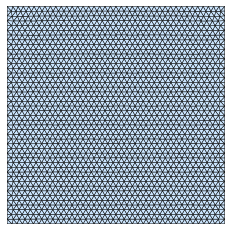

In [ ]:
#Uniforme 630 triangulos

arquivo1 = geracaoDeMalha(lambda p: dm.drectangle(p,0,6,0,6), dm.huniform, 0.15, 6)

arquivo2 = savetxt("/content/1QuadradoUVertices.txt", arquivo1[0])
arquivo3 = savetxt("/content/1QuadradoUTriangulos.txt", arquivo1[1], fmt='%d')


(1946, 2)
(3626, 3)


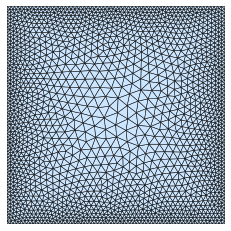

In [ ]:
#Não Uniforme mais ou menos 630 triangulos

arquivo1 = geracaoDeMalha(lambda p: dm.drectangle(p,0,6,0,6), lambda p: dm.drectangle(p,1.5,4.5,1.5,4.5)*-0.4+1, 0.089, 6)

arquivo2 = savetxt("/content/1QuadradoNUVertices.txt", arquivo1[0])
arquivo3 = savetxt("/content/1QuadradoNUTriangulos.txt", arquivo1[1], fmt='%d')

(989, 2)
(1854, 3)


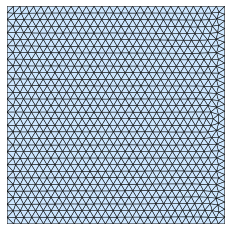

In [ ]:
#Uniforme 1300 triangulos

arquivo1 = geracaoDeMalha(lambda p: dm.drectangle(p,0,6,0,6), dm.huniform, 0.2075, 6)

arquivo2 = savetxt("/content/2QuadradoUVertices.txt", arquivo1[0])
arquivo3 = savetxt("/content/2QuadradoUTriangulos.txt", arquivo1[1], fmt='%d')


(1022, 2)
(1847, 3)


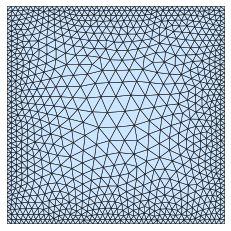

In [ ]:
#Não Uniforme 1300 triangulos

arquivo1 = geracaoDeMalha(lambda p: dm.drectangle(p,0,6,0,6), lambda p: dm.drectangle(p,1.5,4.5,1.5,4.5)*-0.4+1, 0.125, 6)

arquivo2 = savetxt("/content/2QuadradoNUVertices.txt", arquivo1[0])
arquivo3 = savetxt("/content/2QuadradoNUTriangulos.txt", arquivo1[1], fmt='%d')

In [ ]:
#Salvando Autovalores

arquivo1 = calcularValoresVetores(loadtxt("/content/1QuadradoUVertices.txt", dtype=float), loadtxt("/content/1QuadradoUTriangulos.txt", dtype=int))

arquivo10 = savetxt("/content/1QuadradoEigenvaluesU.txt", real(arquivo1[0]))

5371
28847641


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  """


In [ ]:
arquivo2 = calcularValoresVetores(loadtxt("/content/1QuadradoNUVertices.txt", dtype=float), loadtxt("/content/1QuadradoNUTriangulos.txt", dtype=int))

arquivo20 = savetxt("/content/1QuadradoEigenvaluesNU.txt", real(arquivo2[0]))

5307
28164249


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
arquivo3 = calcularValoresVetores(loadtxt("/content/2QuadradoUVertices.txt", dtype=float), loadtxt("/content/2QuadradoUTriangulos.txt", dtype=int))

arquivo30 = savetxt("/content/2QuadradoEigenvaluesU.txt", real(arquivo3[0]))

2720
7398400


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
arquivo4 = calcularValoresVetores(loadtxt("/content/2QuadradoNUVertices.txt", dtype=float), loadtxt("/content/2QuadradoNUTriangulos.txt", dtype=int))

arquivo40 = savetxt("/content/2QuadradoEigenvaluesNU.txt", real(arquivo4[0]))

2673
7144929


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Valor Analitico

#Levantando os valores teóricos para o quadrado

arquivo1 = geracaoAnalitica(123)

arquivo2 = savetxt("/content/ValorAnalitico.txt", arquivo1)

5352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead


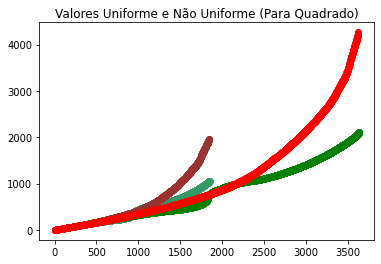

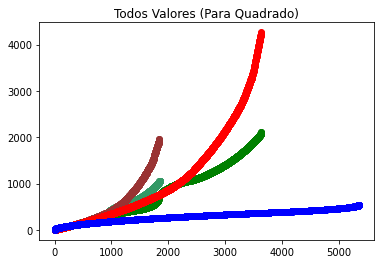

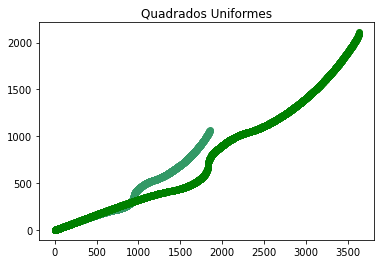

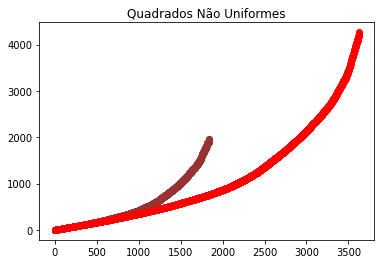

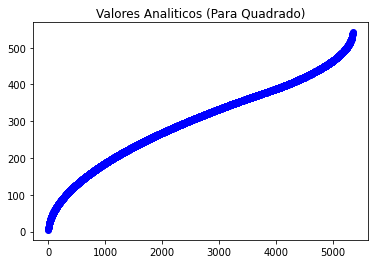

In [ ]:
#Graficos de comparação

eigenvalues = loadtxt("/content/1QuadradoEigenvaluesU.txt")
eigenvalues2 = loadtxt("/content/1QuadradoEigenvaluesNU.txt")
eigenvalues3 = loadtxt("/content/2QuadradoEigenvaluesU.txt")
eigenvalues4 = loadtxt("/content/2QuadradoEigenvaluesNU.txt")
valoranalitico = loadtxt("/content/ValorAnalitico.txt")

NUM_EIGS = 1000000
values  = sorted([x for x in eigenvalues if x > 1e-10])[0:NUM_EIGS]
values2 = sorted([x for x in eigenvalues2 if x > 1e-10])[0:NUM_EIGS]
values3 = sorted([x for x in eigenvalues3 if x > 1e-10])[0:NUM_EIGS]
values4 = sorted([x for x in eigenvalues4 if x > 1e-10])[0:NUM_EIGS]
values5 = sorted([x for x in valoranalitico if x > 1e-10])[0:NUM_EIGS]

#Grafico1
ax = figure().gca()
ax.set_title('Valores Uniforme e Não Uniforme (Para Quadrado)')
ax.plot(values3,'ko', color='#339966')
ax.plot(values4,'ko', color='#993333')
ax.plot(values,'ko', color='green')
ax.plot(values2,'ko', color='red')
#Grafico2
ax2 = figure().gca()
ax2.set_title('Todos Valores (Para Quadrado)')
ax2.plot(values3,'ko', color='#339966')
ax2.plot(values4,'ko', color='#993333')
ax2.plot(values,'ko', color='green')
ax2.plot(values2,'ko', color='red')
ax2.plot(values5,'ko', color='blue')
#Grafico3
ax3 = figure().gca()
ax3.set_title('Quadrados Uniformes')
ax3.plot(values3,'ko', color='#339966')
ax3.plot(values,'ko', color='green')
#Grafico4
ax4 = figure().gca()
ax4.set_title('Quadrados Não Uniformes')
ax4.plot(values4,'ko', color='#993333')
ax4.plot(values2,'ko', color='red')
#Grafico5
ax5 = figure().gca()
ax5.set_title('Valores Analiticos (Para Quadrado)')
ax5.plot(values5,'ko', color='blue')

In [ ]:
#Achar os valores Aproximados do Analitico

arquivo1 = aproximadoDoAnalitico(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/1QuadradoEigenvaluesU.txt'), 0.1)

arquivo2 = savetxt('/content/11QuadradoEigenvaluesU.txt', arquivo1)


Pontos proximos: 1496
Pontos analitico: 5352


In [ ]:
#Achar os valores Aproximados do Analitico

arquivo1 = aproximadoDoAnalitico(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/1QuadradoEigenvaluesNU.txt'), 0.1)

arquivo2 = savetxt('/content/11QuadradoEigenvaluesNU.txt', arquivo1)


Pontos proximos: 1176
Pontos analitico: 5352


In [ ]:
#Achar os valores Aproximados do Analitico

arquivo1 = aproximadoDoAnalitico(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/2QuadradoEigenvaluesU.txt'), 0.1)

arquivo2 = savetxt('/content/22QuadradoEigenvaluesU.txt', arquivo1)


Pontos proximos: 935
Pontos analitico: 5352


In [ ]:
#Achar os valores Aproximados do Analitico

arquivo1 = aproximadoDoAnalitico(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/2QuadradoEigenvaluesNU.txt'), 0.1)

arquivo2 = savetxt('/content/22QuadradoEigenvaluesNU.txt', arquivo1)


Pontos proximos: 922
Pontos analitico: 5352


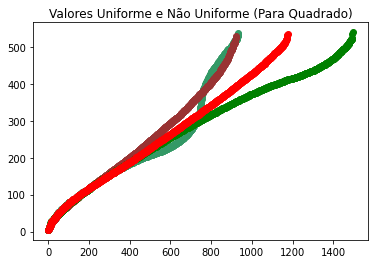

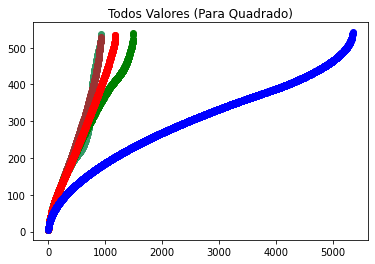

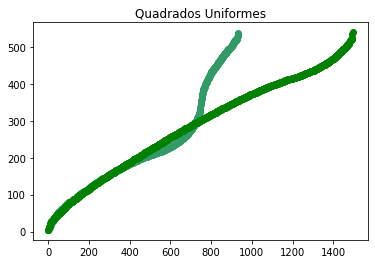

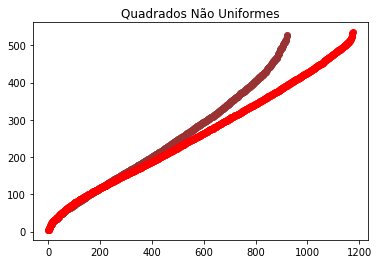

In [ ]:
#Graficos de comparação

eigenvalues = loadtxt("/content/11QuadradoEigenvaluesU.txt")
eigenvalues2 = loadtxt("/content/11QuadradoEigenvaluesNU.txt")
eigenvalues3 = loadtxt("/content/22QuadradoEigenvaluesU.txt")
eigenvalues4 = loadtxt("/content/22QuadradoEigenvaluesNU.txt")
valoranalitico = loadtxt("/content/ValorAnalitico.txt")

NUM_EIGS = 1000000
values  = sorted([x for x in eigenvalues if x > 1e-10])[0:NUM_EIGS]
values2 = sorted([x for x in eigenvalues2 if x > 1e-10])[0:NUM_EIGS]
values3 = sorted([x for x in eigenvalues3 if x > 1e-10])[0:NUM_EIGS]
values4 = sorted([x for x in eigenvalues4 if x > 1e-10])[0:NUM_EIGS]
values5 = sorted([x for x in valoranalitico if x > 1e-10])[0:NUM_EIGS]

#Grafico1
ax = figure().gca()
ax.set_title('Valores Uniforme e Não Uniforme (Para Quadrado)')
ax.plot(values3,'ko', color='#339966')
ax.plot(values4,'ko', color='#993333')
ax.plot(values,'ko', color='green')
ax.plot(values2,'ko', color='red')
#Grafico2
ax2 = figure().gca()
ax2.set_title('Todos Valores (Para Quadrado)')
ax2.plot(values3,'ko', color='#339966')
ax2.plot(values4,'ko', color='#993333')
ax2.plot(values,'ko', color='green')
ax2.plot(values2,'ko', color='red')
ax2.plot(values5,'ko', color='blue')
#Grafico3
ax3 = figure().gca()
ax3.set_title('Quadrados Uniformes')
ax3.plot(values3,'ko', color='#339966')
ax3.plot(values,'ko', color='green')
#Grafico4
ax4 = figure().gca()
ax4.set_title('Quadrados Não Uniformes')
ax4.plot(values4,'ko', color='#993333')
ax4.plot(values2,'ko', color='red')

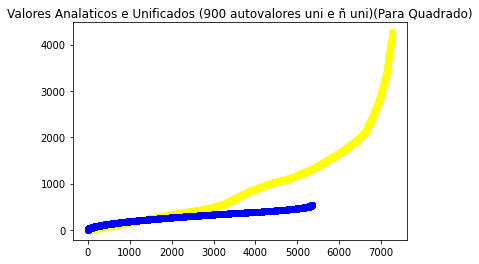

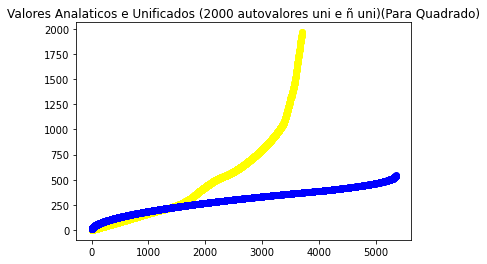

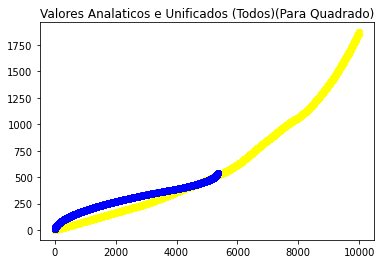

In [ ]:
#Grafico de comparação
somaeigenvalues1 = loadtxt('/content/1EigenvaluesUniNUni.txt') 
somaeigenvalues2 = loadtxt('/content/2EigenvaluesUniNUni.txt') 
somaeigenvalues3 = loadtxt('/content/TodosEigenvalues.txt') 
valoresnaliticos = loadtxt('/content/ValorAnalitico.txt')

NUM_EIGS = 10000 
values = sorted([x for x in somaeigenvalues1 if x > 1e-10])[0:NUM_EIGS] 
values2 = sorted([x for x in somaeigenvalues2 if x > 1e-10])[0:NUM_EIGS] 
values3 = sorted([x for x in somaeigenvalues3 if x > 1e-10])[0:NUM_EIGS] 
values4 = sorted([x for x in valoresnaliticos if x > 1e-10])[0:NUM_EIGS]

#graficos1
ax = figure().gca() 
ax.set_title('Valores Analaticos e Unificados (900 autovalores uni e ñ uni)(Para Quadrado)') 
ax.plot(values,'ko', color='yellow') 
ax.plot(values4,'ko', color='blue')

#graficos2
ax2 = figure().gca() 
ax2.set_title('Valores Analaticos e Unificados (2000 autovalores uni e ñ uni)(Para Quadrado)') 
ax2.plot(values2,'ko', color='yellow') 
ax2.plot(values4,'ko', color='blue')

#graficos3
ax2 = figure().gca() 
ax2.set_title('Valores Analaticos e Unificados (Todos)(Para Quadrado)') 
ax2.plot(values3,'ko', color='yellow') 
ax2.plot(values4,'ko', color='blue')

In [ ]:
#Achar os valores Aproximados do Analitico

arquivo1 = aproximadoDoAnalitico(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/TodosEigenvalues.txt'), 0.1)

arquivo2 = savetxt('/content/ProximoDoAnalitico.txt', arquivo1)


Pontos proximos: 4529
Pontos analitico: 5352


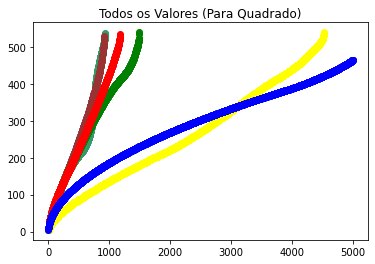

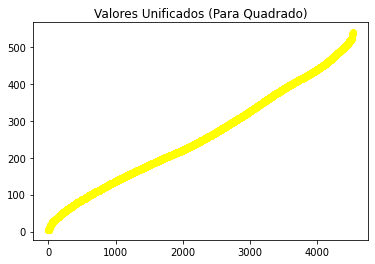

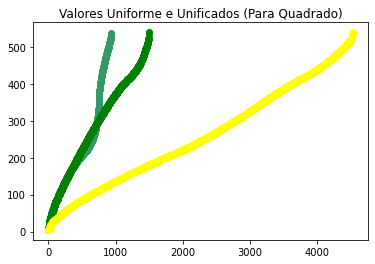

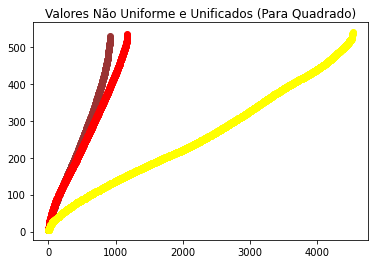

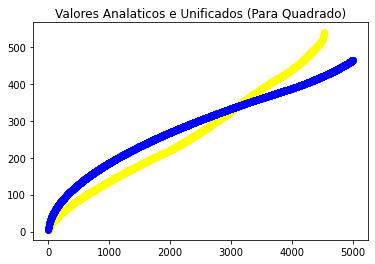

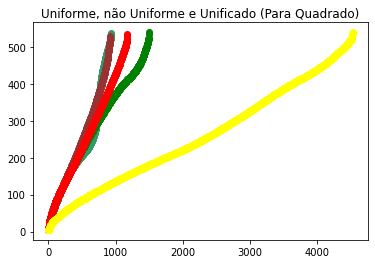

In [ ]:
#Graficos de comparação

eigenvalues = loadtxt('/content/11QuadradoEigenvaluesU.txt')
eigenvalues2 = loadtxt('/content/11QuadradoEigenvaluesNU.txt')
eigenvalues3 = loadtxt('/content/22QuadradoEigenvaluesU.txt')
eigenvalues4 = loadtxt('/content/22QuadradoEigenvaluesNU.txt')
somaeigenvalues = loadtxt('/content/ProximoDoAnalitico.txt')
valoresanaliticos = loadtxt('/content/ValorAnalitico.txt')

NUM_EIGS = 5000
values = sorted([x for x in eigenvalues if x > 1e-10])[0:NUM_EIGS]
values2 = sorted([x for x in eigenvalues2 if x > 1e-10])[0:NUM_EIGS]
values3 = sorted([x for x in eigenvalues3 if x > 1e-10])[0:NUM_EIGS]
values4 = sorted([x for x in eigenvalues4 if x > 1e-10])[0:NUM_EIGS]
values5 = sorted([x for x in somaeigenvalues if x > 1e-10])[0:NUM_EIGS]
values6 = sorted([x for x in valoresanaliticos if x > 1e-10])[0:NUM_EIGS]

#grafico1
ax = figure().gca()
ax.set_title('Todos os Valores (Para Quadrado)')
ax.plot(values3,'ko', color='#339966')
ax.plot(values4,'ko', color='#993333')
ax.plot(values,'ko', color='green')
ax.plot(values2,'ko', color='red')
ax.plot(values5,'ko', color='yellow')
ax.plot(values6,'ko', color='blue')
#grafico2
ax2 = figure().gca()
ax2.set_title('Valores Unificados (Para Quadrado)')
ax2.plot(values5,'ko', color='yellow')
#grafico3
ax3 = figure().gca()
ax3.set_title('Valores Uniforme e Unificados (Para Quadrado)')
ax3.plot(values3,'ko', color='#339966')
ax3.plot(values,'ko', color='green')
ax3.plot(values5,'ko', color='yellow')
#grafico4
ax4 = figure().gca()
ax4.set_title('Valores Não Uniforme e Unificados (Para Quadrado)')
ax4.plot(values4,'ko', color='#993333')
ax4.plot(values2,'ko', color='red')
ax4.plot(values5,'ko', color='yellow')
#grafico5
ax5 = figure().gca()
ax5.set_title('Valores Analaticos e Unificados (Para Quadrado)')
ax5.plot(values5,'ko', color='yellow')
ax5.plot(values6,'ko', color='blue')
#grafico6
ax6 = figure().gca()
ax6.set_title('Uniforme, não Uniforme e Unificado (Para Quadrado)')
ax6.plot(values3,'ko', color='#339966')
ax6.plot(values4,'ko', color='#993333')
ax6.plot(values,'ko', color='green')
ax6.plot(values2,'ko', color='red')
ax6.plot(values5,'ko', color='yellow')

In [ ]:
#Calcular a porcentagem

uniforme = calcularPorcentagem(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/11QuadradoEigenvaluesU.txt'), 0.1)
print("Uniforme: " + str(uniforme) + " %")
nuniforme = calcularPorcentagem(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/11QuadradoEigenvaluesNU.txt'), 0.1)
print("Não Uniforme: " + str(nuniforme) + " %")
uniforme = calcularPorcentagem(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/22QuadradoEigenvaluesU.txt'), 0.1)
print("Uniforme: " + str(uniforme) + " %")
nuniforme = calcularPorcentagem(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/22QuadradoEigenvaluesNU.txt'), 0.1)
print("Não Uniforme: " + str(nuniforme) + " %")
proximoanalitico = calcularPorcentagem(loadtxt('/content/ValorAnalitico.txt'), loadtxt('/content/ProximoDoAnalitico.txt'), 0.1)
print("Unifificado: " + str(proximoanalitico) + " %")



Pontos proximos: 1496
Pontos analitico: 5352
Uniforme: 27.95 %

Pontos proximos: 1176
Pontos analitico: 5352
Não Uniforme: 21.97 %

Pontos proximos: 935
Pontos analitico: 5352
Uniforme: 17.47 %

Pontos proximos: 922
Pontos analitico: 5352
Não Uniforme: 17.23 %

Pontos proximos: 4529
Pontos analitico: 5352
Unifificado: 84.62 %
